In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

input_path1 = '/home/vivana/projects/ml-basics/housing/dataset/'

In [24]:
house_data = pd.read_csv(input_path1 + 'AmesHousing.csv')
test = pd.read_csv(input_path1 + 'test.csv')
copied_house_data = house_data.copy()
copied_house_data.columns = copied_house_data.columns.str.replace(' ', '')
copied_house_data

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


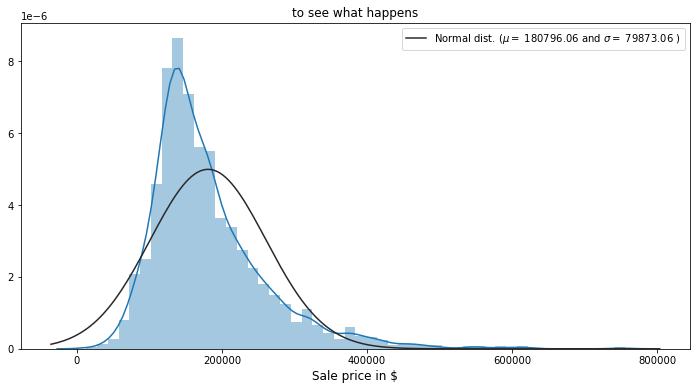

In [7]:
# lets visualize our dataset and analys them -> EDA
(mu, sigma) = norm.fit(copied_house_data['SalePrice'])

plt.figure(figsize=(12,6))
sns.distplot(copied_house_data['SalePrice'], kde = True, hist=True, fit = norm) #it lets you draw a diagram with lines on it
plt.xlabel('Sale price in $', fontsize = 12)
plt.title('to see what happens', fontsize=12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')

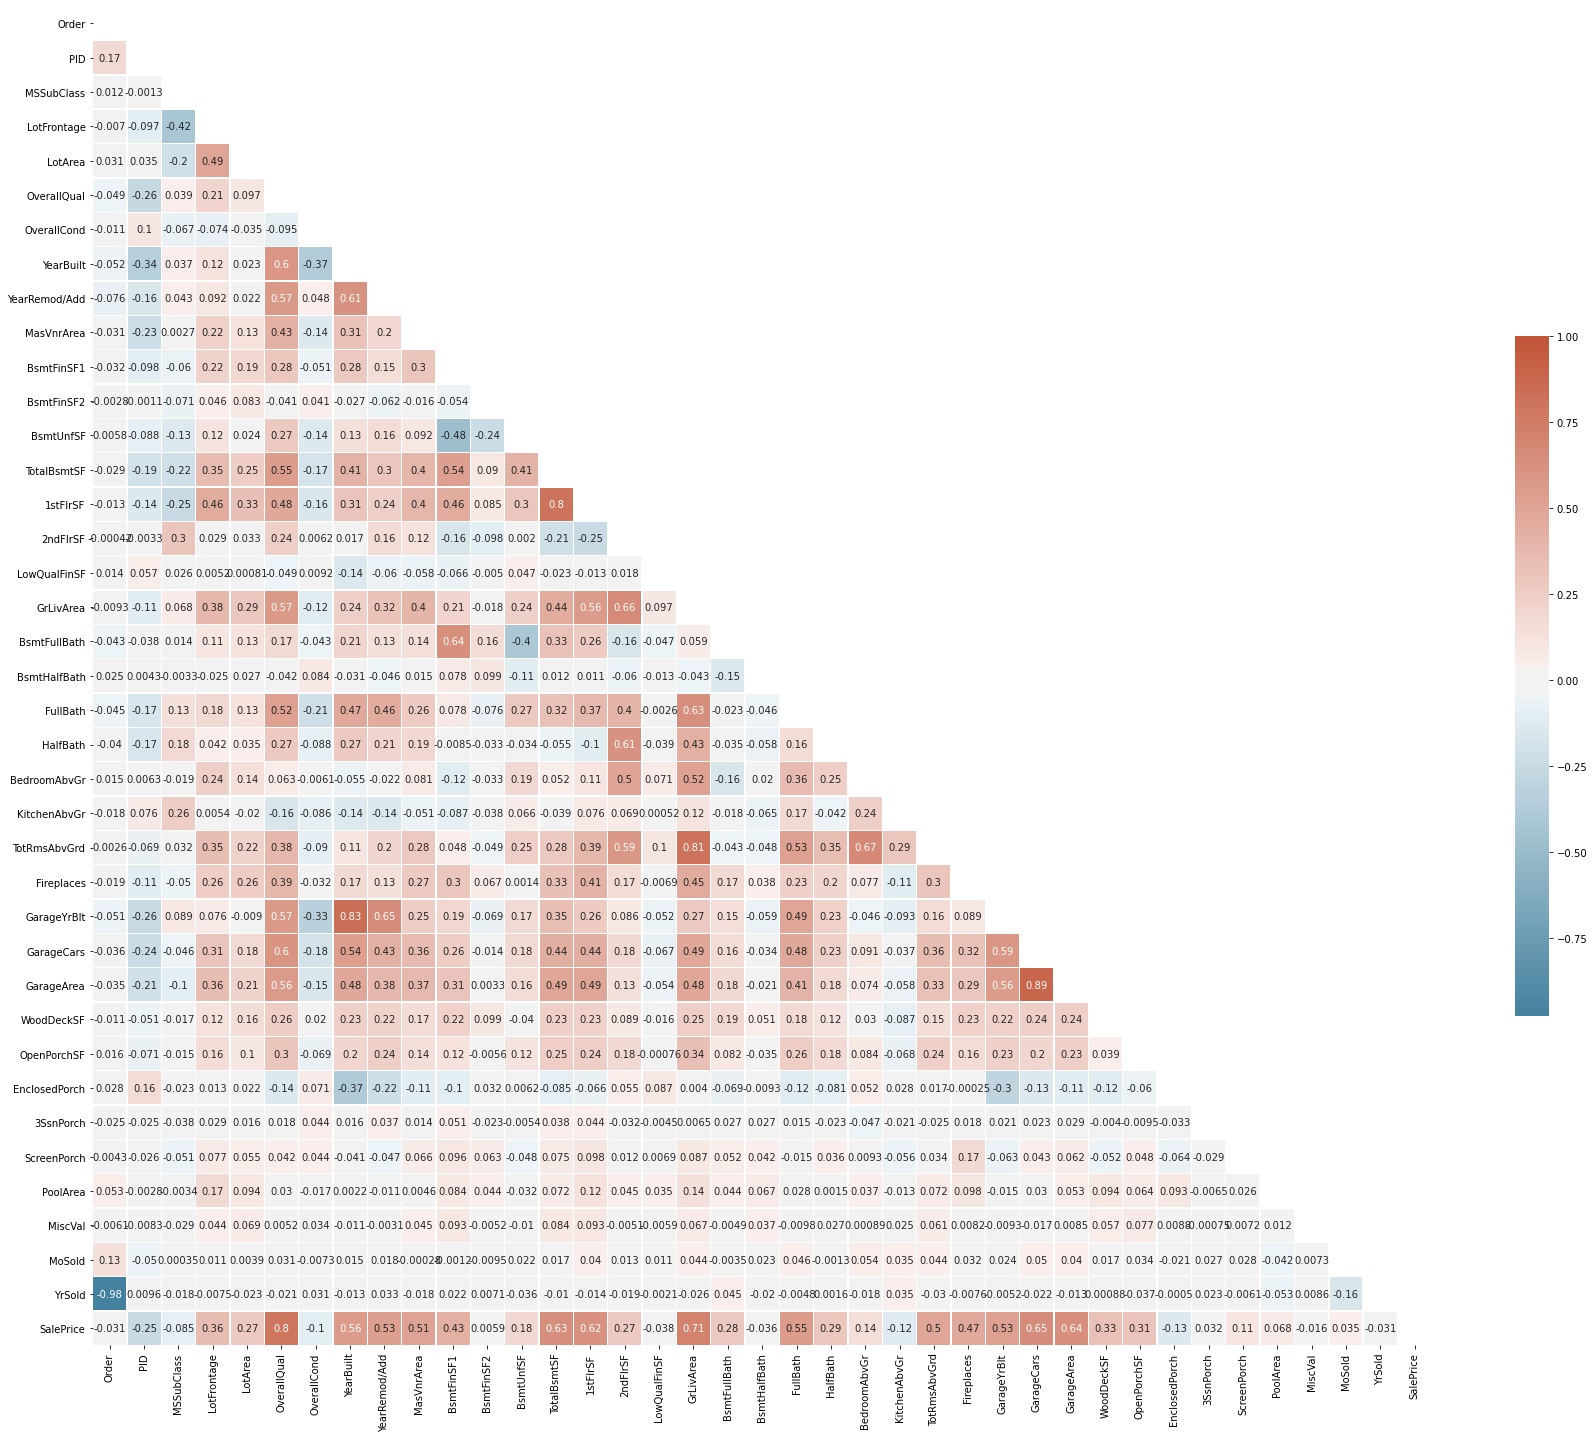

In [23]:
#correlation matrix
f, ax = plt.subplots(figsize = (30,25))
mat = copied_house_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

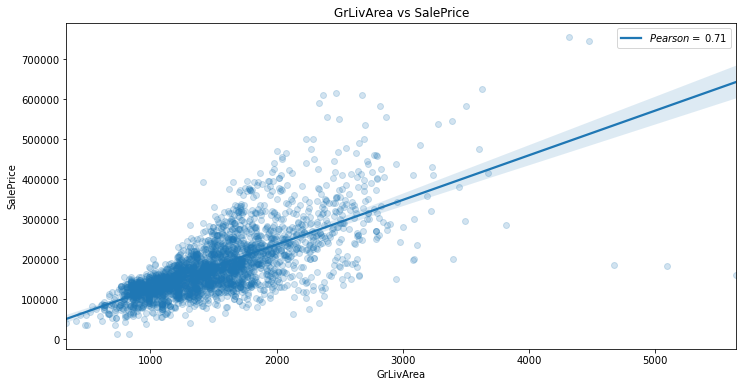

In [25]:
pearson_g = 0.71
plt.figure(figsize=(12,6))
sns.regplot(data=copied_house_data, x = 'GrLivArea', y = 'SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(pearson_g)], loc = 'best')
plt.show()

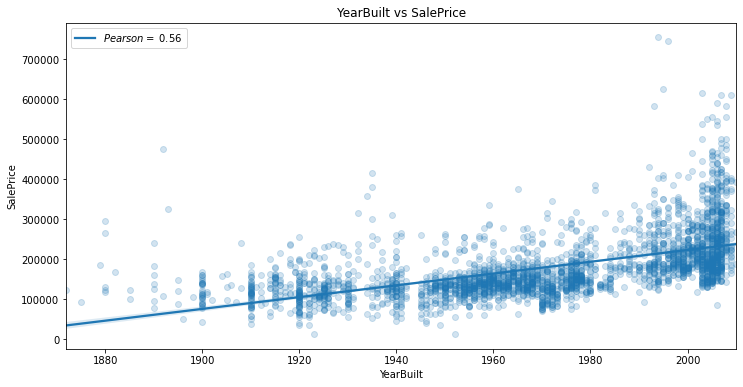

In [26]:
pearson_yearBuilt = 0.56
plt.figure(figsize=(12,6))
sns.regplot(data=copied_house_data, x = 'YearBuilt', y = 'SalePrice', scatter_kws={'alpha': 0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(pearson_yearBuilt)], loc = 'best')
plt.show()

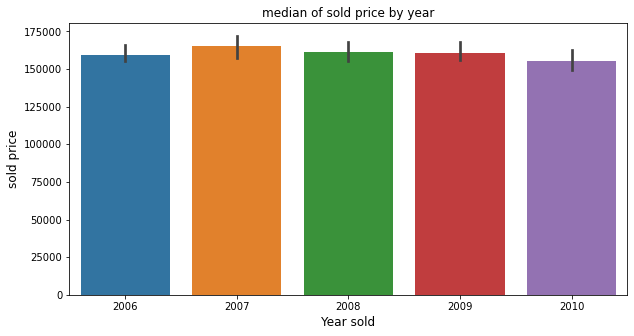

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=copied_house_data, estimator=np.median)
plt.title('median of sold price by year', fontsize = 12)
plt.xlabel('Year sold', fontsize = 12)
plt.ylabel('sold price', fontsize = 12)
plt.show()